In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("/content/Housing.csv")

In [ ]:
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: xlabel='price', ylabel='area'>

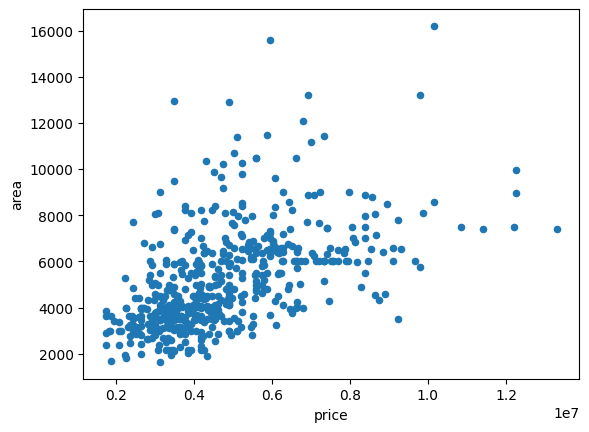

In [ ]:
df.plot(kind='scatter',x='price',y='area',alpha=1)

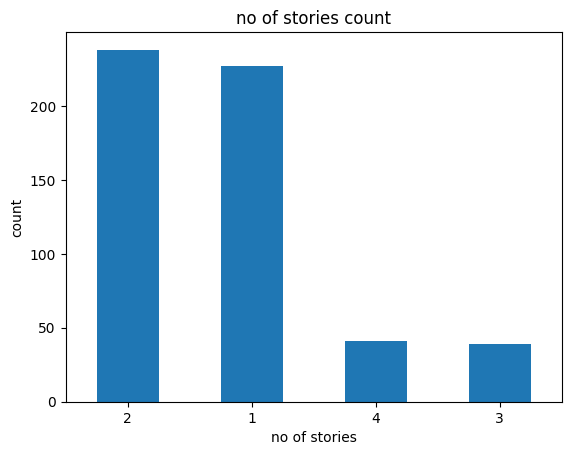

In [ ]:
stories_count= df['stories'].value_counts()

stories_count.plot(kind='bar')

plt.title("no of stories count")
plt.xlabel("no of stories")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

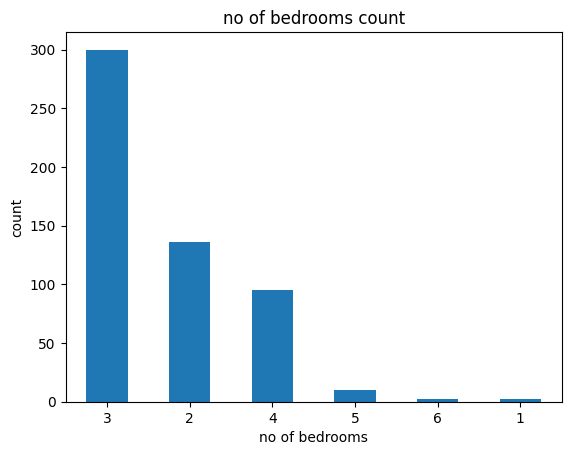

In [ ]:
bedrooms_count= df['bedrooms'].value_counts()
bedrooms_count.plot(kind='bar')
plt.title("no of bedrooms count")
plt.xlabel("no of bedrooms")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

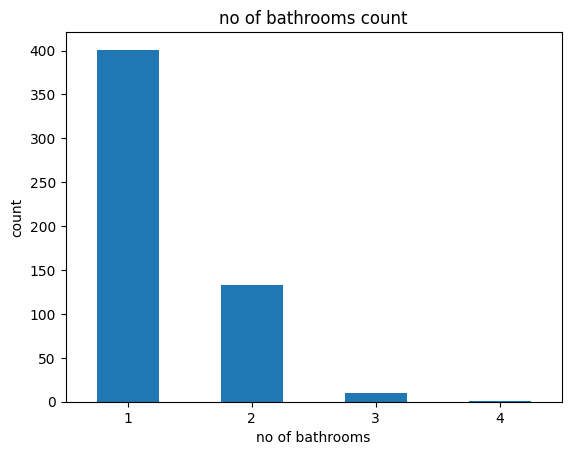

In [ ]:
bathrooms_count= df['bathrooms'].value_counts()

bathrooms_count.plot(kind='bar')

plt.title("no of bathrooms count")
plt.xlabel("no of bathrooms")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

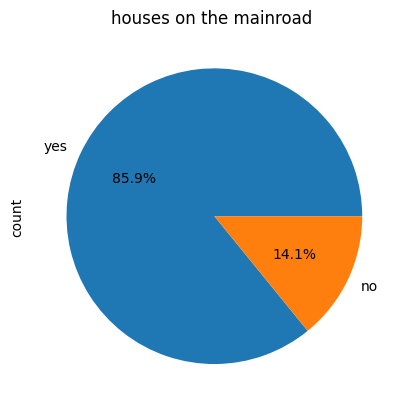

In [ ]:
mainroad_count= df['mainroad'].value_counts()
mainroad_count.plot(kind='pie',autopct='%1.1f%%')
plt.title("houses on the mainroad ")
plt.show()

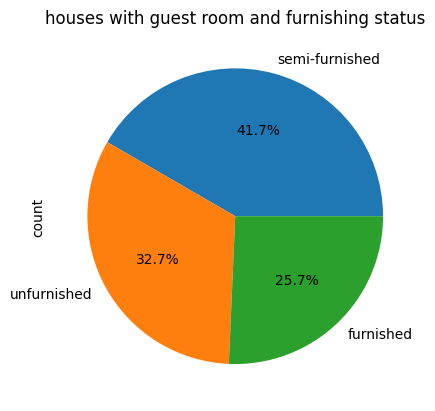

In [ ]:
furnished_house_count= df['furnishingstatus'].value_counts()
furnished_house_count.plot(kind='pie',autopct='%1.1f%%')
plt.title("houses with guest room and furnishing status")
plt.show()

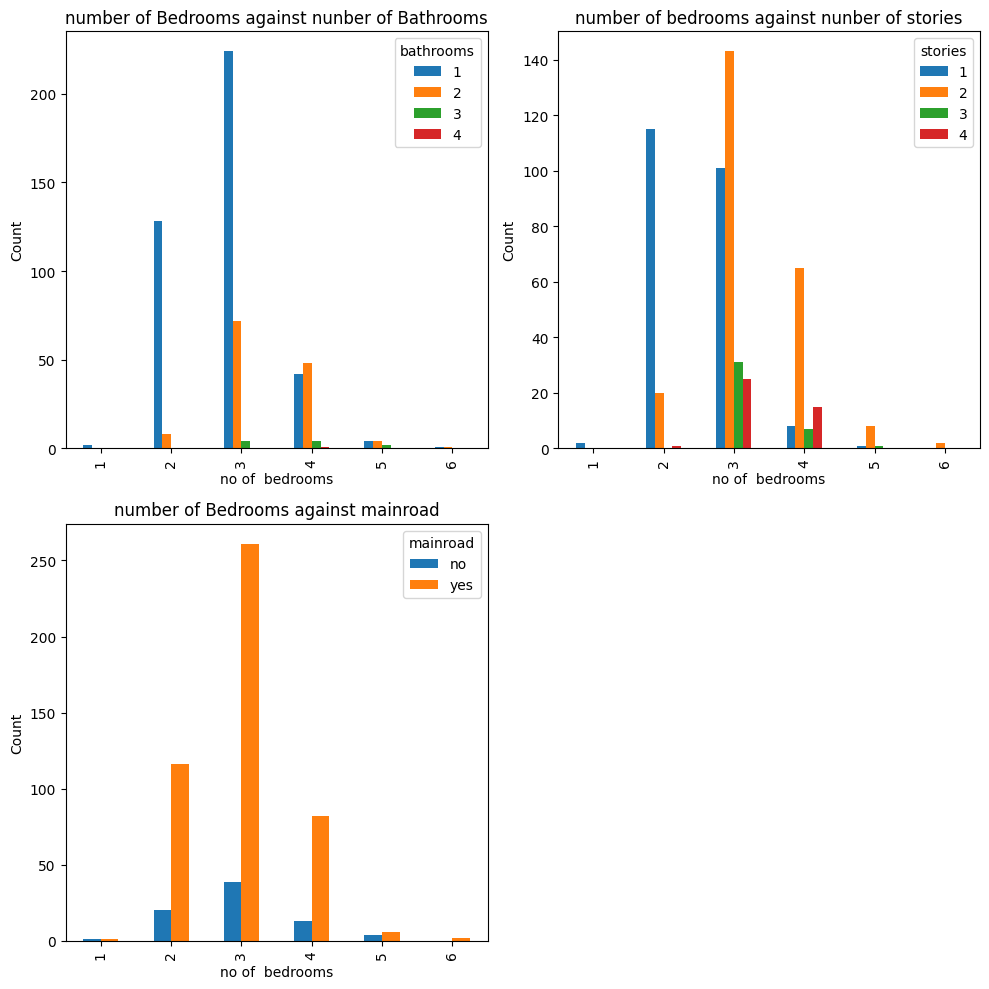

In [ ]:
#1
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
bedrom_bathrom= pd.crosstab(df['bedrooms'], df['bathrooms'])
bedrom_bathrom.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("number of Bedrooms against nunber of Bathrooms")
axes[0, 0].set_xlabel("no of  bedrooms")
axes[0,0 ].set_ylabel("Count")

#2
bedrom_storie= pd.crosstab(df['bedrooms'], df['stories'])
bedrom_storie.plot(kind='bar', ax=axes[0, 1])
axes[0,1].set_title("number of bedrooms against nunber of stories")
axes[0,1].set_xlabel("no of  bedrooms")
axes[0,1].set_ylabel("Count")

#3
bedrom_mainroad= pd.crosstab(df['bedrooms'], df['mainroad'])
bedrom_mainroad.plot(kind='bar', ax=axes[1, 0])
axes[1,0].set_title("number of Bedrooms against mainroad")
axes[1,0].set_xlabel("no of  bedrooms")
axes[1,0 ].set_ylabel("Count")
#4
axes[1,1].axis('off')
plt.tight_layout()
plt.show()


In [24]:
encoder = LabelEncoder()
enodingcolmn = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for coulmn in enodingcolmn:
  df[coulmn]=encoder.fit_transform(df[coulmn])

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [26]:
x=df.drop(columns=['price'],axis=1)
y=df['price']

In [28]:
scl=MinMaxScaler()
x=scl.fit_transform(x)
y=scl.fit_transform(y.values.reshape(-1,1))

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

In [30]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [32]:
y_prediction = linear.predict(x_test)
MAE = mean_absolute_error(y_test,y_prediction)
MSE = mean_squared_error(y_test,y_prediction)

In [33]:
MSE

0.005205309710355548

In [34]:
MAE

0.05715306207704202

In [35]:
#accuracy
accuracy= r2_score(y_test,y_prediction)
accuracy

0.664531596541099